# SOAL UAS

NIM : 2020230067
    
Nama : putri yasmin jayaditia 

### Soal :

- Download dataset iris.csv di salah satu public dataset : keggle, UCI, dsbnya
- Gunakan Dataset : iris.cvs, pilih satu algoritma yang terbaik berdasarkan evaluasi, simpan menggunakan pickle, siapkan app py, deploy dengan streamlit dan upload ke server stremlit

In [7]:
import pandas as pd
from sklearn import datasets


In [8]:
df_klasifikasi=pd.read_csv('iris.csv')
df_klasifikasi

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
#Feature selection
X=df_klasifikasi[['sepal_length','sepal_width','petal_length','petal_width']]

#Target
y=df_klasifikasi['species']
print(X)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: obj

## Normalize Data - Scalling

In [13]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [14]:
print("10 data pertama: ")
print(X[:10])

10 data pertama: 
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]


In [15]:
print("10 label pertama: ")
print(y[:10])

10 label pertama: 
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: species, dtype: object


# 1. Pembagian Data

## 1.1 Train-Validation Split


Train-Validation split dapat dilakukan dengan menjalankan potongan kode di bawah. Persentase pembagian data training dan data validasi dapat ditentukan dengan mengubah nilai parameter train_size.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [17]:
print("Banyak data latih setelah dilakukan Train-Validation Split: ", len(X_train))
print("Banyak data uji setelah dilakukan Train-Validation Split: ", len(X_test))

Banyak data latih setelah dilakukan Train-Validation Split:  105
Banyak data uji setelah dilakukan Train-Validation Split:  45


In [18]:
print("Label Training\n",y_train.value_counts())
print("\nLabel Prediksi\n",y_test.value_counts())

Label Training
 species
Iris-versicolor    37
Iris-virginica     36
Iris-setosa        32
Name: count, dtype: int64

Label Prediksi
 species
Iris-setosa        18
Iris-virginica     14
Iris-versicolor    13
Name: count, dtype: int64


## 1.2	K-Fold Cross Validation

Pustaka Scikit-learn menyediakan wrapper untuk melakukan K-Fold Cross Validation, yaitu dengan meng-import cross_val_score. cross_val_score menerima input berupa model machine learning, data training, label training, dan nilai K. Output yang dikeluarkan akan berupa list berisi akurasi setiap fold, sehingga untuk mendapatkan nilai rata-rata akurasi dari setiap foldnya, dapat menggunakan built-in function mean().

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(kernel = 'linear', C = 1)
scores = cross_val_score(model, X, y, cv = 5)
print("Akurasi model SVM untuk tiap fold: ", scores)
print("Akurasi model SVM dengan 5-Fold Cross Validation: ", scores.mean())

# y_pred = lr.predict(X_test)
# score = metrics.accuracy_score(y_test, y_pred)
# print("Akurasi dengan menggunakan Logistic Regression: ", score)
# from sklearn.metrics import precision_recall_fscore_support
# P=precision_recall_fscore_support(y_test, y_pred, average='macro')
# print("Precison : ",P[0])
# print("Recall : ",P[1])
# print("F Score : ",P[2])

Akurasi model SVM untuk tiap fold:  [0.96666667 1.         0.93333333 0.93333333 1.        ]
Akurasi model SVM dengan 5-Fold Cross Validation:  0.9666666666666668


# 2. Metode Klasifikasi

Untuk potongan-potongan kode Metode Klasifikasi, data yang akan digunakan adalah data yang telah terbagi oleh proses Train-Validation split. Model akan dilatih dengan X_train dan y_train. Model yang telah terlatih kemudian diuji performa akurasinya menggunakan X_test dan y_test.

## 2.1 Logistic Regression

Penjelasan lebih lengkap mengenai penggunaan Logistic Regression dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Logistic Regression: ", score)

Akurasi dengan menggunakan Logistic Regression:  0.9555555555555556


In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


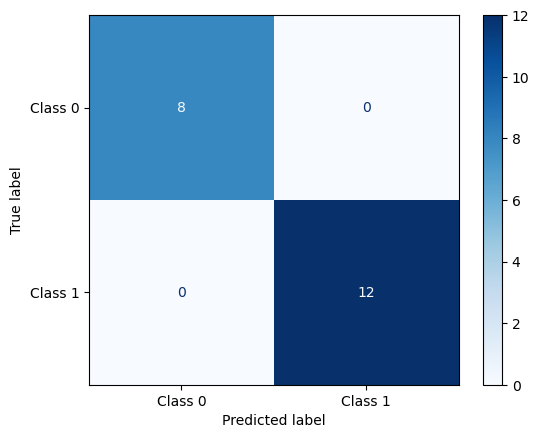

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [33]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate example data for demonstration purposes
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate and print precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


## 2.2 Support Vector Machine

Penjelasan lebih lengkap mengenai penggunaan Support Vector Machine dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [34]:
from sklearn.svm import SVC
from sklearn import metrics

svm = SVC(
  kernel = 'rbf',
  C = 1,
  gamma = 0.01
)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine: ", score)

Akurasi dengan menggunakan Support Vector Machine:  1.0


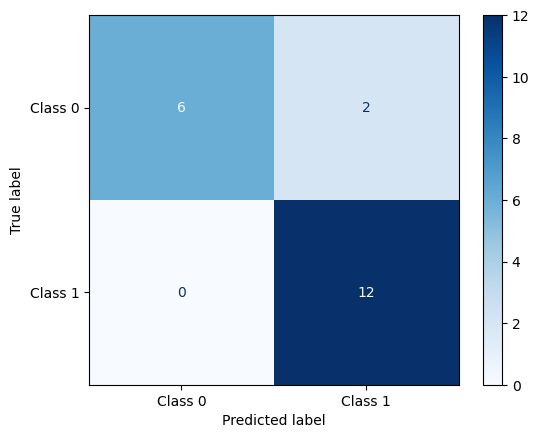

Akurasi testing SVM: 0.9
Precision: 0.9285714285714286
Recall: 0.875
F1 Score: 0.8901098901098901


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate example data for demonstration purposes
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a support vector machine (SVM) classifier
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi testing SVM:', accuracy)

# Calculate and print precision, recall, and F1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


### Hyperparameter SVM

Saat menggunakan model SVM, beberapa parameter dapat diubah sesuai dengan kebutuhan, antara lain kernel (linear, polynomial, rbf), nilai C, dan nilai Gamma.

In [38]:
# SVM dengan kernel Linear, nilai parameter C dapat diubah juga.
svmLinear = SVC(
  kernel = 'linear',
      C = 1)

svmLinear.fit(X_train, y_train)
y_pred = svmLinear.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine Linear Kernel: ", score)

Akurasi dengan menggunakan Support Vector Machine Linear Kernel:  1.0


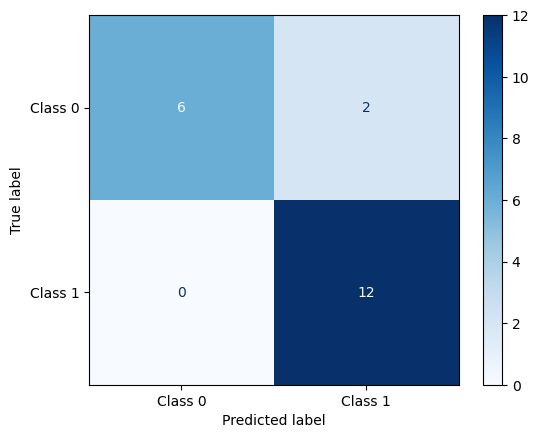

Akurasi Testing SVM: 0.9
Precison :  0.9285714285714286
Recall :  0.875
F Score :  0.8901098901098901


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate example data for demonstration purposes
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a support vector machine (SVM) classifier
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

print('Akurasi Testing SVM:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

In [43]:
# SVM dengan kernel polynomial, nilai parameter C, degree, dan gamma dapat diubah juga.
svmPoly = SVC(
  kernel = 'poly',
  C = 1,
  gamma = 0.01,
  degree = 2
)

svmPoly.fit(X_train, y_train)
y_pred = svmPoly.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel: ", score)

Akurasi dengan menggunakan Support Vector Machine Polynomial Kernel:  0.4


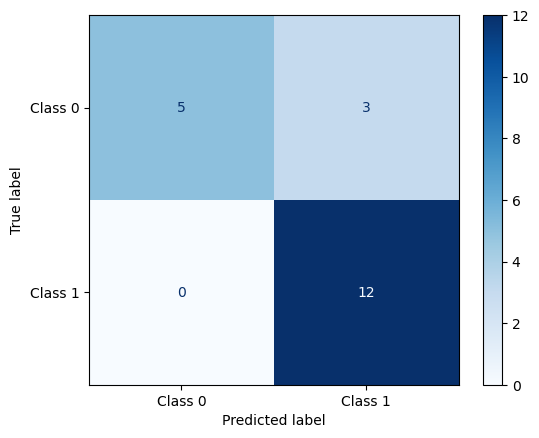

akurasi testing NBC: 0.85


In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate example data for demonstration purposes
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a support vector machine (SVM) classifier with a polynomial kernel
svmPoly = SVC(kernel='poly')
svmPoly.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svmPoly.predict(X_test)

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print('akurasi testing NBC:', accuracy)


In [50]:
# SVM dengan kernel RBF, nilai parameter C dan gamma dapat diubah juga.
svmRBF = SVC(
  kernel = 'rbf',
  C = 1,
  gamma = 0.01,
)

svmRBF.fit(X_train, y_train)
y_pred = svmRBF.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Support Vector Machine RBF Kernel: ", score)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

Akurasi dengan menggunakan Support Vector Machine RBF Kernel:  1.0
Precison :  1.0
Recall :  1.0
F Score :  1.0


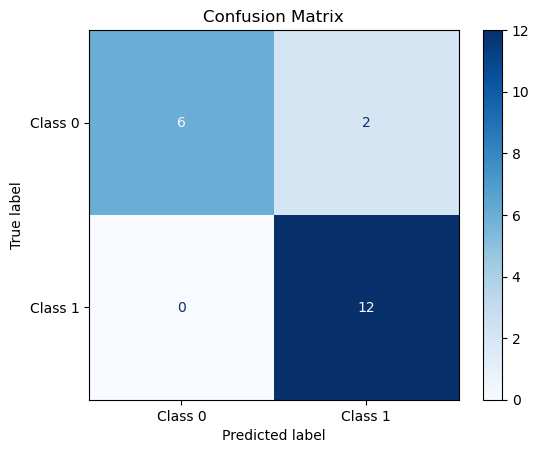

Akurasi testing NBC: 0.9
Precision: 0.9285714285714286
Recall: 0.875
F1 Score: 0.8901098901098901


In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate example data for demonstration purposes
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a support vector machine (SVM) classifier with RBF kernel
svmRBF = SVC(kernel='rbf')
svmRBF.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svmRBF.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi testing NBC:', accuracy)

# Calculate and print precision, recall, and F1 score
P = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision:", P[0])
print("Recall:", P[1])
print("F1 Score:", P[2])


## 2.3 Decision Tree

Penjelasan lebih lengkap mengenai penggunaan Decision Tree dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt = DecisionTreeClassifier(
  max_depth = None,
  min_samples_split = 2
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Decision Tree: ", score)

Akurasi dengan menggunakan Decision Tree:  0.9


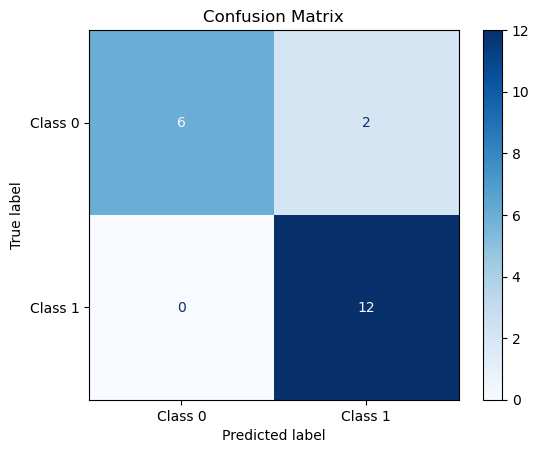

Akurasi testing Decision tree: 0.9
Precision: 0.9285714285714286
Recall: 0.875
F1 Score: 0.8901098901098901


In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate example data for demonstration purposes
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi testing Decision tree:', accuracy)

# Calculate and print precision, recall, and F1 score
P = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision:", P[0])
print("Recall:", P[1])
print("F1 Score:", P[2])


### Hyperparameter Decision Tree

Saat menggunakan model Decision Tree, beberapa parameter dapat diubah sesuai dengan kebutuhan, antara max_depth dan min_samples_split.

In [65]:
# Decision Tree dengan maximal kedalaman adalah max_depth,
# dan minimal jumlah sampel untuk dibentuk leaf baru adalah min_samples_split

dt = DecisionTreeClassifier(
  max_depth = 130,
  min_samples_split = 5
)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Decision Tree: ", score)

Akurasi dengan menggunakan Decision Tree:  0.9


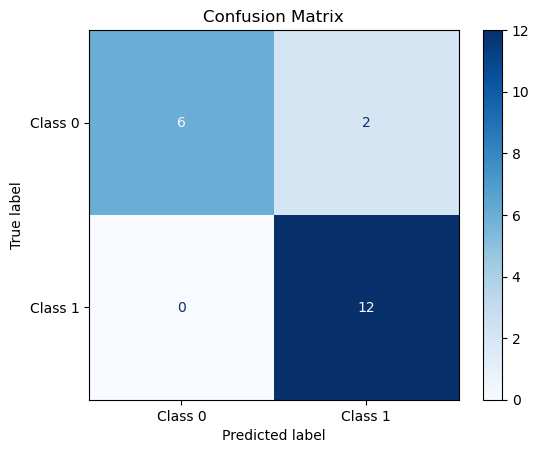

Akurasi Testing NBC: 0.9
Precison :  0.9285714285714286
Recall :  0.875
F Score :  0.8901098901098901


In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate example data for demonstration purposes
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print('Akurasi Testing NBC:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## 2.4 Naive Bayes

Penjelasan lebih lengkap mengenai penggunaan Naive Bayes dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB

In [68]:
from sklearn import naive_bayes
from sklearn import metrics

nb = naive_bayes.BernoulliNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Naive Bayes: ", score)

Akurasi dengan menggunakan Naive Bayes:  0.95


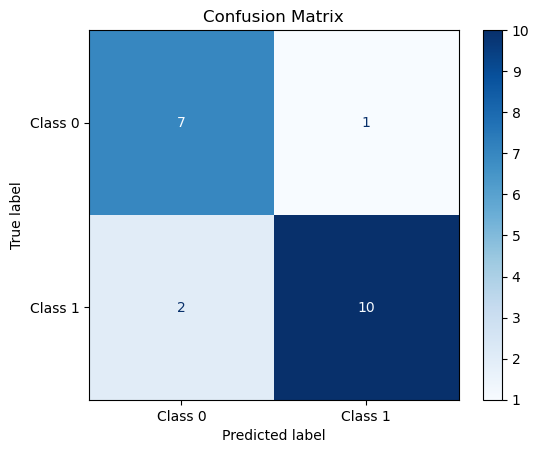

Akurasi Testing NBC: 0.9
Precison :  0.8434343434343434
Recall :  0.8541666666666667
F Score :  0.8465473145780051


In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Generate example data for demonstration purposes
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print('Akurasi Testing NBC:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## 2.5 K-Nearest Neighbors

Penjelasan lebih lengkap mengenai penggunaan K-Nearest Neighbors dapat dilihat pada https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Nearest Neighbor: ", score)

Akurasi dengan menggunakan Nearest Neighbor:  0.9


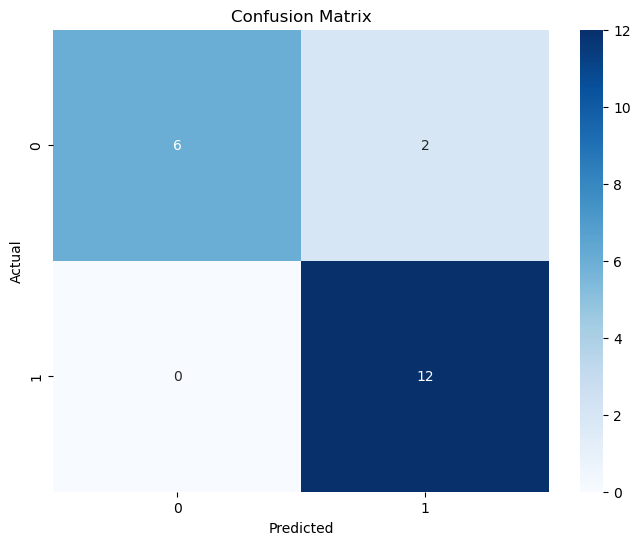

Akurasi Testing K-NN: 0.9
Precison :  0.9285714285714286
Recall :  0.875
F Score :  0.8901098901098901


In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming knn is your K-NN classifier
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Akurasi Testing K-NN:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## 2.6 AdaBoostClassifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [75]:
ab=AdaBoostClassifier(
n_estimators=600,
learning_rate=1
)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan AdaBoostClassifier: ", score)

Akurasi dengan menggunakan AdaBoostClassifier:  0.9


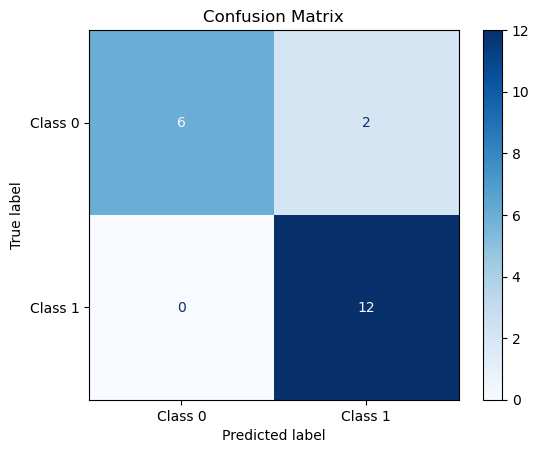

Akurasi Testing adaBoost: 0.9
Precison :  0.9285714285714286
Recall :  0.875
F Score :  0.8901098901098901


In [78]:

# Generate example data for demonstration purposes
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


print('Akurasi Testing adaBoost:', accuracy)

from sklearn.metrics import precision_recall_fscore_support
P=precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precison : ",P[0])
print("Recall : ",P[1])
print("F Score : ",P[2])

## Perbandingan Hasil Klasifikasi Data Pendaftar Untuk Berbagai Metoda Klasifikasi :


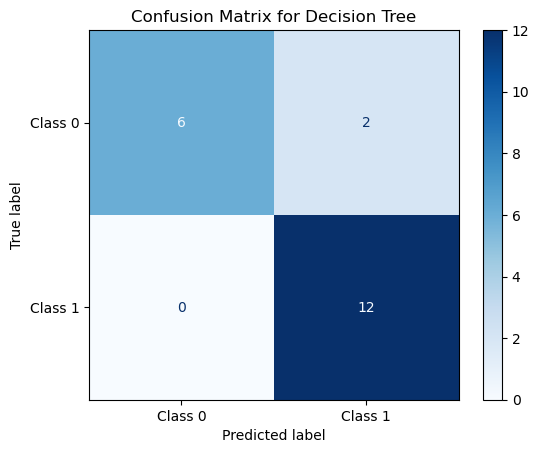

Accuracy for Decision Tree: 0.9
Precision for Decision Tree: 0.9285714285714286
Recall for Decision Tree: 0.875
F1 Score for Decision Tree: 0.8901098901098901


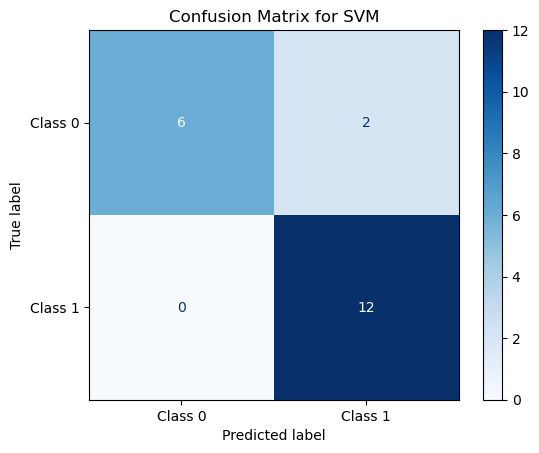

Accuracy for SVM: 0.9
Precision for SVM: 0.9285714285714286
Recall for SVM: 0.875
F1 Score for SVM: 0.8901098901098901


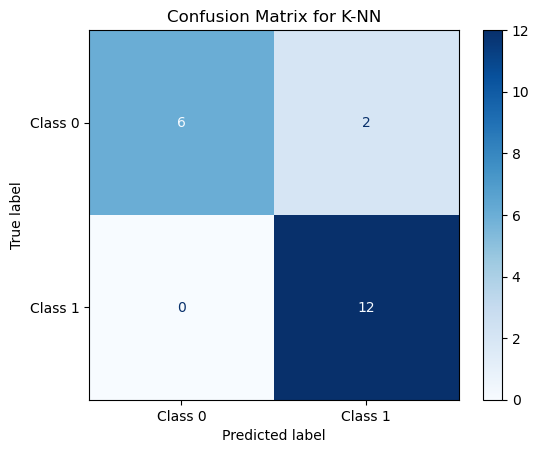

Accuracy for K-NN: 0.9
Precision for K-NN: 0.9285714285714286
Recall for K-NN: 0.875
F1 Score for K-NN: 0.8901098901098901

Results:
Decision Tree: {'Accuracy': 0.9, 'Precision': 0.9285714285714286, 'Recall': 0.875, 'F1 Score': 0.8901098901098901}
SVM: {'Accuracy': 0.9, 'Precision': 0.9285714285714286, 'Recall': 0.875, 'F1 Score': 0.8901098901098901}
K-NN: {'Accuracy': 0.9, 'Precision': 0.9285714285714286, 'Recall': 0.875, 'F1 Score': 0.8901098901098901}


In [79]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate example data for demonstration purposes
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "K-NN": KNeighborsClassifier()
}

results = {}

for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {name}: {accuracy}')

    # Calculate and print precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(f'Precision for {name}: {precision}')
    print(f'Recall for {name}: {recall}')
    print(f'F1 Score for {name}: {f1}')

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Print results for all classifiers
print("\nResults:")
for name, metrics in results.items():
    print(f"{name}: {metrics}")



---

## Pilih satu satu Algortima yang hasil trainingnya terbaik menurut anda dan Menyimpan model dengan pickle  Gunakan untuk anda Deploy dalam bentuk aplikasi streamlit dan upload ke streamlit

In [80]:
import pickle
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate example data for demonstration purposes
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)

# Save the trained model to a file using pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(svm, model_file)
